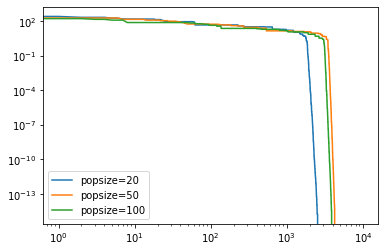

In [6]:
import numpy as np
import matplotlib.pyplot as plt


def de(fobj, bounds, mut=0.8, crossp=0.7, popsize=20, its=1000):
    dimensions = len(bounds)
    pop = np.random.rand(popsize, dimensions)
    min_b, max_b = np.asarray(bounds).T
    diff = np.fabs(min_b - max_b)
    pop_denorm = min_b + pop * diff
    fitness = np.asarray([fobj(ind) for ind in pop_denorm])
    best_idx = np.argmin(fitness)
    best = pop_denorm[best_idx]
    for i in range(its):
        for j in range(popsize):
            idxs = [idx for idx in range(popsize) if idx != j]
            a, b, c = pop[np.random.choice(idxs, 3, replace = False)]
            mutant = np.clip(a + mut * (b - c), 0, 1)
            cross_points = np.random.rand(dimensions) < crossp
            if not np.any(cross_points):
                cross_points[np.random.randint(0, dimensions)] = True
            trial = np.where(cross_points, mutant, pop[j])
            trial_denorm = min_b + trial * diff
            f = fobj(trial_denorm)
            if f < fitness[j]:
                fitness[j] = f
                pop[j] = trial
                if f < fitness[best_idx]:
                    best_idx = j
                    best = trial_denorm
        yield best, fitness[best_idx]
        
def fobj(x):
    return sum(x ** 2 - 10 * np.cos(2 * np.pi * x) + 10)

# for mut in (0.3, 0.5, 0.9):
#     it = list(de(fobj, [(-10, 10)] * 10, mut = mut , its=10000))    
#     x, f = zip(*it)
#     plt.plot(f, label='mut={}'.format(mut))
#     plt.xscale('log')
#     plt.yscale('log')
    
# for cr in (0.1, 0.3, 0.9):
#     it = list(de(fobj, [(-10, 10)] * 10, crossp = cr , its=10000))    
#     x, f = zip(*it)
#     plt.plot(f, label='cr={}'.format(cr))
#     plt.xscale('log')
#     plt.yscale('log')
    
for popsize1 in (20, 50, 100):
    it = list(de(fobj, [(-10, 10)] * 10, popsize = popsize1 , its=10000))    
    x, f = zip(*it)
    plt.plot(f, label='popsize={}'.format(popsize1))
    plt.xscale('log')
    plt.yscale('log')
    
# it = list(de(fobj, [(-10,10)]*10, its = 5000))
# print(it[-1])
# x, f = zip(*it)
# plt.plot(f, label='de')
plt.legend() 

          
plt.savefig('第3个参数改变效果')